## Import Libraries

In [1]:
from turtle import forward
import torch 
import torch.nn as nn 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split as tts 
import matplotlib.pyplot as plt 

## Read Data 

In [2]:
data = pd.read_csv('data/data.csv')
data.columns = ['feature1', 'feature2', 'target']

X = torch.from_numpy(data[['feature1', 'feature2']].values).float() 
y = torch.from_numpy(data[['target']].values).float()

## Split the Data

In [3]:
x_train, x_test, y_train, y_test = tts(X, y, train_size=0.7, random_state=73)

print(type(x_train), type(y_train))
print(x_train)
print(data.head(4)) 
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([[0.4964, 0.4538],
        [0.3106, 0.5070],
        [0.4222, 0.6167],
        [0.5384, 0.3277],
        [0.2877, 0.2914],
        [0.4028, 0.0351],
        [0.6991, 0.3731],
        [0.7144, 0.7668],
        [0.8528, 0.8599],
        [0.8964, 0.7085],
        [0.3975, 0.3190],
        [0.8518, 0.6612],
        [0.7614, 0.6014],
        [0.6738, 0.7797],
        [0.5893, 0.7158],
        [0.2753, 0.3322],
        [0.1643, 0.2776],
        [0.5092, 0.3526],
        [0.7897, 0.7423],
        [0.7703, 0.7014],
        [0.4455, 0.4512],
        [0.2564, 0.4262],
        [0.6591, 0.7155],
        [0.5453, 0.6391],
        [0.7299, 0.8107],
        [0.7323, 0.6424],
        [0.2763, 0.2126],
        [0.7906, 0.5611],
        [0.7076, 0.7602],
        [0.6209, 0.8042],
        [0.7315, 0.7452],
        [0.2548, 0.3460],
        [0.3815, 0.4622],
        [0.5191, 0.6236],
        [0.7998, 0.7485],
        [0.4583, 0.4641],
        [0.1525, 0

## Create Model

In [4]:
class NeuralModel(nn.Module):
    def __init__(self, input, hidden1, hidden2, hidden3, output):
        super(NeuralModel, self).__init__()

        self.first_layer    = nn.Linear(input, hidden1)
        self.second_hidden  = nn.Linear(hidden1, hidden2)
        self.third_hidden   = nn.Linear(hidden2, hidden3)
        self.output         = nn.Linear(hidden3, output)

        self.sigmoid    = nn.Sigmoid()
        self.relu       = nn.ReLU()
        self.softmax    = nn.Softmax()

    def forward(self, x): 
        x = self.first_layer(x)
        x = self.sigmoid(x)
        x = self.second_hidden(x)
        x = self.relu(x)
        x = self.third_hidden(x)
        x = self.softmax(x)
        x = self.output(x) 
        x = self.sigmoid(x)
        return x 


In [5]:
model = NeuralModel(2, 12, 16, 20, 1)

## Criterion and Optimizer

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

## Train the Model

In [7]:
all_train_losses, all_test_losses, accuracies = [], [], []

torch.manual_seed(28)

for it in range(200): 
    optimizer.zero_grad()
    prediction = model.forward(x_train)
    train_loss = criterion(prediction, y_train)
    train_loss.backward()
    optimizer.step()
    all_train_losses.append(train_loss.item())

    model.eval()
    with torch.no_grad():
        test_prediction = model.forward(x_test)
        test_loss = criterion(test_prediction, y_test)
        result = test_prediction > 0.5
        # print(result)
        accuracy = sum(result == y_test) / result.shape[0]
    model.train()

    all_test_losses.append(test_loss.item())
    accuracies.append(accuracy)

    print(f'{it + 1 :4}  /{200:5}  :     Train Loss  {train_loss.item():20}    |  Test Loss  :  {test_loss.item()}')

C:\Users\zorve\AppData\Local\Temp\ipykernel_17004\2507706071.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


   1  /  200  :     Train Loss     0.697534441947937    |  Test Loss  :  0.6978779435157776
   2  /  200  :     Train Loss    0.6964557766914368    |  Test Loss  :  0.6967610120773315
   3  /  200  :     Train Loss    0.6955106258392334    |  Test Loss  :  0.6957840323448181
   4  /  200  :     Train Loss       0.6947061419487    |  Test Loss  :  0.6949521899223328
   5  /  200  :     Train Loss    0.6940456628799438    |  Test Loss  :  0.6942760348320007
   6  /  200  :     Train Loss    0.6935365200042725    |  Test Loss  :  0.6937366724014282
   7  /  200  :     Train Loss    0.6931606531143188    |  Test Loss  :  0.6933333277702332
   8  /  200  :     Train Loss     0.692913293838501    |  Test Loss  :  0.6930525898933411
   9  /  200  :     Train Loss    0.6927776336669922    |  Test Loss  :  0.6928739547729492
  10  /  200  :     Train Loss    0.6927289962768555    |  Test Loss  :  0.6927703022956848
  11  /  200  :     Train Loss    0.6927374005317688    |  Test Loss  :  0.69271

## Plot the Result

c:\Users\zorve\anaconda3\envs\deeplearning\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
c:\Users\zorve\anaconda3\envs\deeplearning\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


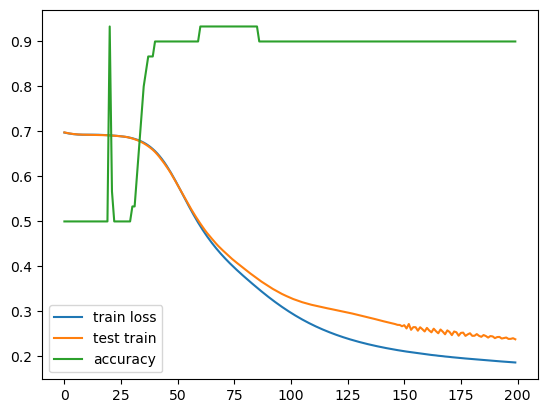

In [8]:
plt.plot(all_train_losses, label='train loss')
plt.plot(all_test_losses, label='test train')
plt.plot(accuracies, label='accuracy')
plt.legend()
plt.show()

## Make Prediction

In [9]:
practice = torch.tensor([2, 3]).float()
print('Prediction :  ', model.forward(practice))

Prediction :   tensor([0.0787], grad_fn=<SigmoidBackward0>)


C:\Users\zorve\AppData\Local\Temp\ipykernel_17004\2507706071.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)
